# Predicting Rental Price thru Linear Regression
- different data points are provided for 500 odd homes
- will try to establish a relationship between price and other features
- based on the relationships, a model will be built, which fits well for predicting price for any home with same features
- using the model, any home's price can be predicted

## Part-1: Importing the necessary libraries

In [61]:
import numpy as np
import pandas as pd

## Part-2: Uploading the dataset

In [62]:
df=pd.read_excel('Housing.xlsx')   # uploading the dataset

In [63]:
df.head()    # reading the first five rows of the dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
df.info()    # checking for any null values, as well as dtypes for each variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [65]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


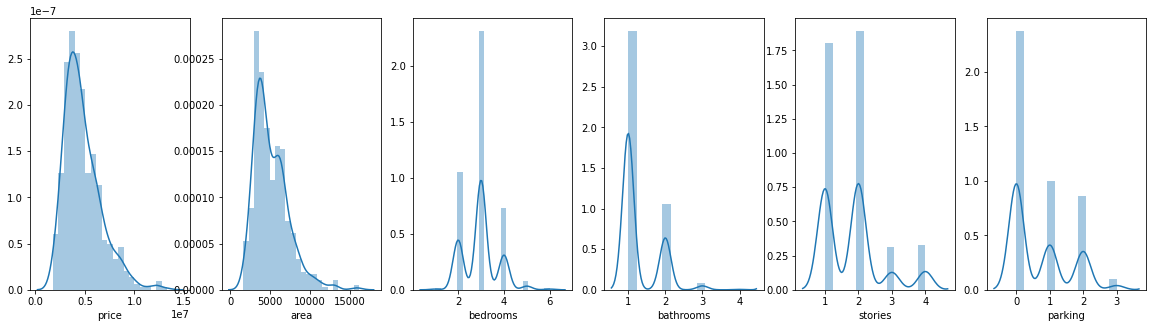

In [66]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(20,5))

sns.distplot(df['price'], ax=ax1)
sns.distplot(df['area'], ax=ax2)
sns.distplot(df['bedrooms'], ax=ax3)
sns.distplot(df['bathrooms'], ax=ax4)
sns.distplot(df['stories'], ax=ax5)
sns.distplot(df['parking'], ax=ax6)
plt.show()

In [67]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


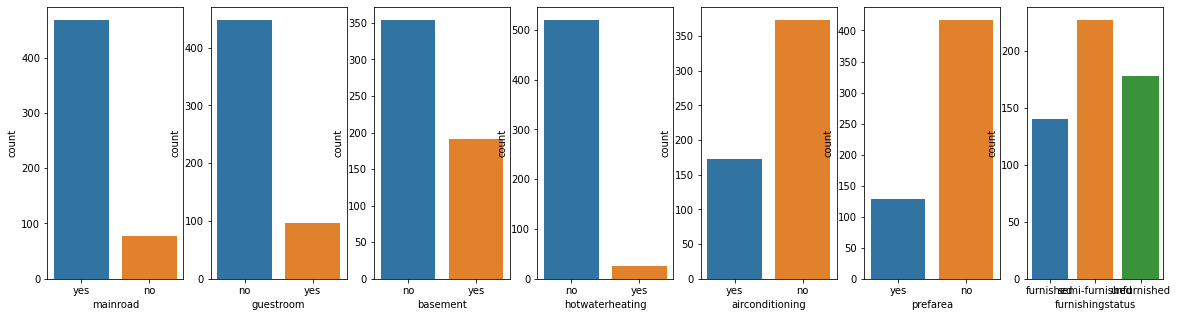

In [68]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(20,5))

sns.countplot(df['mainroad'], ax=ax1)
sns.countplot(df['guestroom'], ax=ax2)
sns.countplot(df['basement'], ax=ax3)
sns.countplot(df['hotwaterheating'], ax=ax4)
sns.countplot(df['airconditioning'], ax=ax5)
sns.countplot(df['prefarea'], ax=ax6)
sns.countplot(df['furnishingstatus'], ax=ax7)
plt.show()

### Inference from the dataset
- we have data for 545 homes
- There are no null values
- 12 different features are available, which may decide the price
- An average home has 4600 area, 3 bedrooms, 1 bathroom, 2 stories, and no parking
- most of the homes are on mainroad, have no guestroom, no basement, no hotwaterheating, no airconditioning and semi-furnished

## Part-3: Visualizing the dataset

In [69]:
# importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

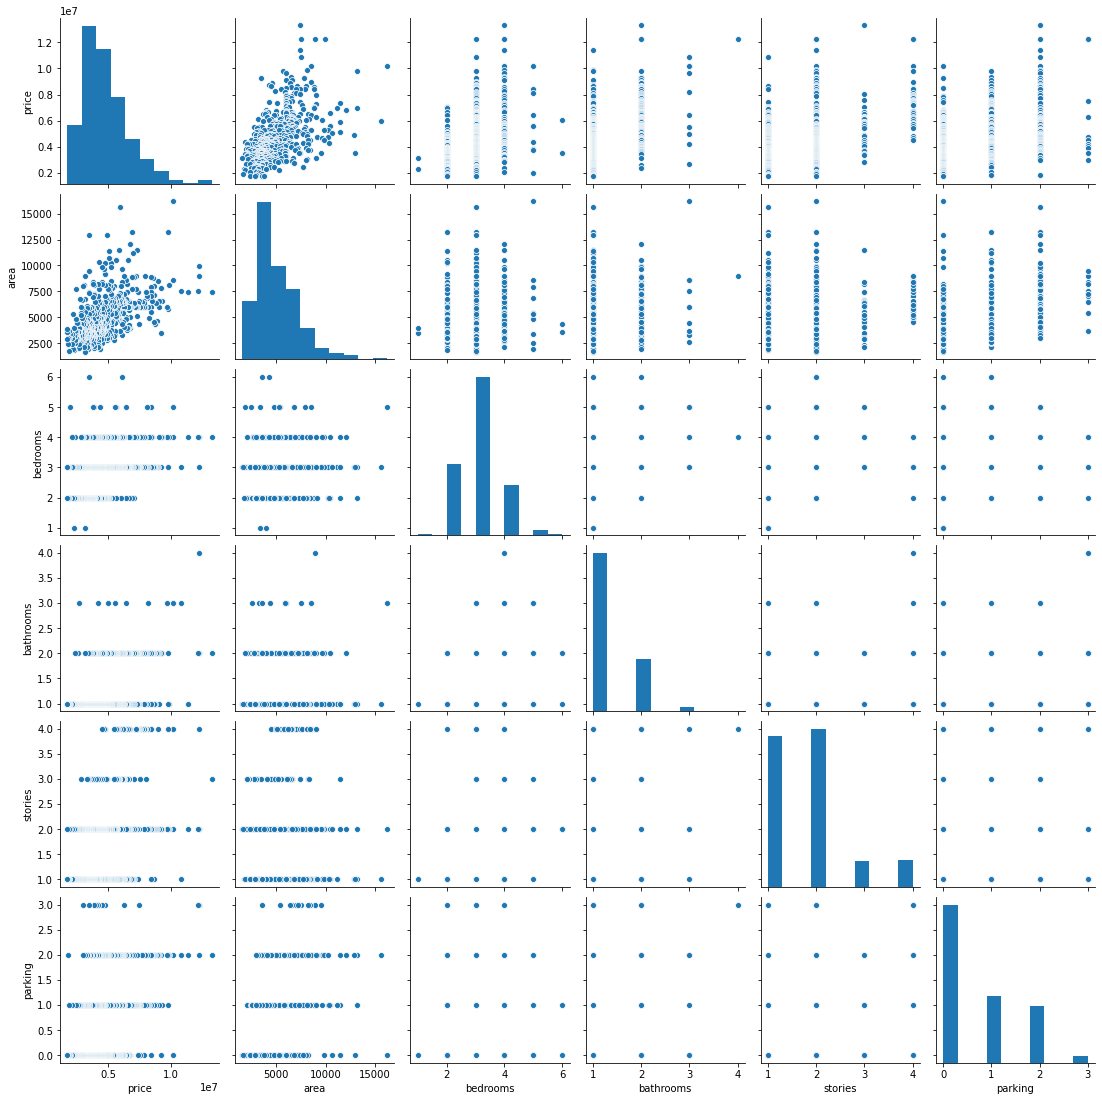

In [70]:
# pairplots for all the numerical features and their correlation with price
sns.pairplot(df)
plt.show()

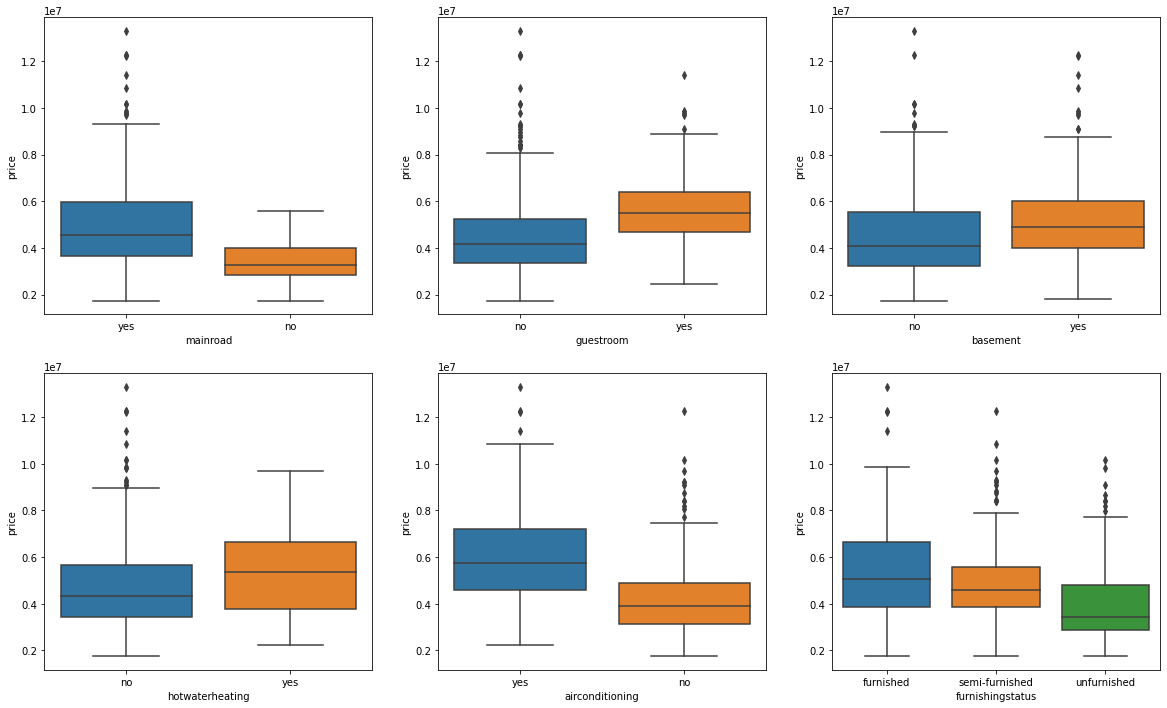

In [71]:
# boxplots for all the categorical variables and their correlation with price

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='price', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.show()


### Inference from the correlations
- area has a direct correlation with price; so any model must include area
- the other numerical features doesn't show as distinct a correlation with price
- among the categorical features, mainroad, guestroom, prefarea, airconditioning seems to have a higher correlation with price
- the numerical features, other than price, doesn't seem to have a significant correlation with each other
- hence, there should not be much issue with multicollinearity among the independent variables

## Part-4: Data Preparation
- converting categorical data into numerical
- binary conversion, and one hot coding

In [72]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [73]:
# converting all 'yes', 'no' values into 1 and 0 thru binary coding

# list of features to map
features=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes':1, 'no':0})

# applying the map function to the data
df[features]=df[features].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [74]:
# will now change the furnishingstatus values by one hot coding

# Get the dummy variables for the feature 'furnishingstatus' (3 categories) and store it in a new variable - 'status'
#send the  categorical column to the get.dummies()
status=pd.get_dummies(df['furnishingstatus'])

status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [75]:
# we can drop one of the columns, to limit the number of features
# dropping the 1st column
status=pd.get_dummies(df['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [76]:
# add status to df with concat function
df1=pd.concat([df, status], axis=1)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [77]:
# we can now drop the furnishingstatus column
df1.drop('furnishingstatus', axis=1, inplace=True)

In [78]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [79]:
df1.dtypes

price              int64
area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int64
guestroom          int64
basement           int64
hotwaterheating    int64
airconditioning    int64
parking            int64
prefarea           int64
semi-furnished     uint8
unfurnished        uint8
dtype: object

### We now have all the features as numerical data

## Part-5: Rescaling all the independent variables
- will need to rescale area, bedrooms and others so that the values of all features can be comparable

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler=MinMaxScaler()

In [82]:
# apply scaler to all the variables
num_features=['area','bedrooms','bathrooms','stories','parking']
df1[num_features]=scaler.fit_transform(df1[num_features])

In [83]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


### We now have rescaled all data under each independent features

## Part-6: Splitting into Training and Test datasets

In [84]:
from sklearn.model_selection import train_test_split

# specifying the same so that train and test data have fixed datasets
df1_train, df1_test=train_test_split(df1, train_size=0.8, test_size=0.2, random_state=50)

In [85]:
df1_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
333,3920000,0.092784,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,1,0
37,7980000,0.505155,0.6,0.333333,1.000000,1,0,0,0,1,0.666667,0,0,0
396,3500000,0.136770,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,0,1,0
494,2730000,0.353952,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1
536,1960000,0.121649,0.8,0.000000,0.333333,0,0,0,0,0,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,4375000,0.154639,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1
472,3010000,0.136082,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,1,0
521,2408000,0.136426,0.2,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,1
145,5600000,0.230241,0.4,0.000000,1.000000,1,0,0,0,0,0.000000,0,0,0


In [86]:
df1_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
271,4340000,0.017526,0.8,0.000000,0.333333,0,0,1,0,0,0.000000,0,1,0
355,3773000,0.453608,0.4,0.000000,0.000000,1,0,0,0,0,0.666667,0,0,0
151,5565000,0.189003,0.6,0.000000,0.333333,1,0,0,0,1,0.666667,1,1,0
29,8400000,0.264605,0.6,0.333333,0.333333,1,0,1,0,1,0.333333,1,1,0
534,2100000,0.092784,0.6,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,6790000,0.161512,0.4,0.333333,0.333333,1,0,1,0,1,0.000000,1,1,0
132,5810000,0.243986,0.4,0.000000,0.666667,1,0,0,0,1,0.000000,0,1,0
289,4200000,0.288660,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,0,1,0
109,6090000,0.341237,0.6,0.333333,0.333333,1,1,0,1,0,0.333333,0,1,0


### We now have split the main dataset into 436 rows of train data, and 109 rows of test data

## Part-7: Checking for Multi-collinearity in Training dataset

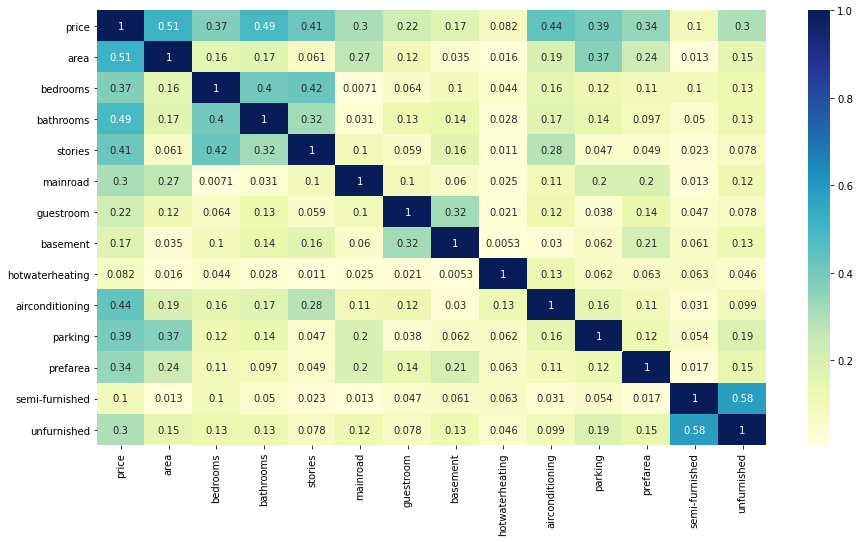

In [87]:
# checking for collinearity map to understand which variables are correlated
plt.figure(figsize=(15,8))
sns.heatmap(df1_train.corr().abs(), annot=True, cmap='YlGnBu')
plt.show()

### Multi-collinearity among independent features
- among the independent variables, area and parking has some collinearity, but less than 0.5
- bedrooms have some collinearity with bathrooms and stories, but less than 0.5
- guestrooms and basement have some collinearity, but less than 0.5
- so, no independent variables have any significant levels of collinearity
- the important features that have higher correlation with price are area, bathrooms, stories, airconditioning, parking
- hence, these features need to be present in the model to predict price

## Part-8: Removing Target and Independent variables into separate datasets

In [88]:
y_train=df1_train['price']
x_train=df1_train.drop('price', axis=1)

In [89]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
271,0.017526,0.8,0.000000,0.333333,0,0,1,0,0,0.000000,0,1,0
355,0.453608,0.4,0.000000,0.000000,1,0,0,0,0,0.666667,0,0,0
151,0.189003,0.6,0.000000,0.333333,1,0,0,0,1,0.666667,1,1,0
29,0.264605,0.6,0.333333,0.333333,1,0,1,0,1,0.333333,1,1,0
534,0.092784,0.6,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.161512,0.4,0.333333,0.333333,1,0,1,0,1,0.000000,1,1,0
132,0.243986,0.4,0.000000,0.666667,1,0,0,0,1,0.000000,0,1,0
289,0.288660,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,0,1,0
109,0.341237,0.6,0.333333,0.333333,1,1,0,1,0,0.333333,0,1,0


## Part-9: Building a linear model

### Using Stats model

In [90]:
# The API focuses on models and the most frequently used statistical test, and tools.
import statsmodels.api as st

In [91]:
# adding a constant that will represent the y-intercept W0
# this adds a feature column so that the training includes w0

x_train_lm=st.add_constant(x_train[['area']])
x_train_lm.head()

,const,area
271,1.0,0.017526
355,1.0,0.453608
151,1.0,0.189003
29,1.0,0.264605
534,1.0,0.092784


In [92]:
# Creating a first fitted model  OLS= Ordinary Least Squares
# Fitting a line between price and area

lr=st.OLS(y_train, x_train_lm).fit()

# checking the parameters obtained
lr.params

const    3.244843e+06
area     6.300056e+06
dtype: float64

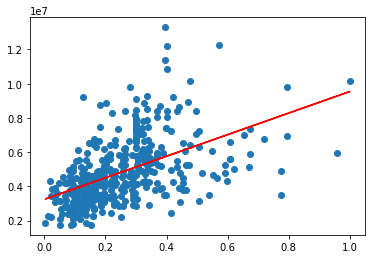

In [93]:
# visualizing the data with a scatter plot and the fitted regression line
# plot of area on x-axis and price on y-axis
plt.scatter(x_train_lm['area'], y_train)   #this is the area column

#Plot the regression line  W0+W1*Area
plt.plot(x_train_lm['area'], 3.244843e+06 + 6.300056e+06 * x_train_lm['area'], 'r')
plt.show()


In [94]:
# summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           7.21e-31
Time:                        00:09:50   Log-Likelihood:                -6849.1
No. Observations:                 436   AIC:                         1.370e+04
Df Residuals:                     434   BIC:                         1.371e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.245e+06   1.45e+05     22.378      0.0

### R2 and Adj R2 are 0.265 and 0.263 respectively with only one feature in the model
### will now be adding the other features one by one and check the movement in R2 and Adj R2 values

In [95]:
# Assign two feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
lr.params

const       1.830651e+06
area        5.722769e+06
bedrooms    3.978519e+06
dtype: float64

In [96]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     117.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.38e-41
Time:                        00:09:50   Log-Likelihood:                -6821.5
No. Observations:                 436   AIC:                         1.365e+04
Df Residuals:                     433   BIC:                         1.366e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.831e+06    2.3e+05      7.970      0.0

### The R2 and Adj R2 have increased after adding bedrooms' so will keep bedrooms in the model

In [97]:
# Assign three feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const        2.262494e+06
area         5.275178e+06
bedrooms     2.176620e+06
bathrooms    3.960198e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.33e-56
Time:                        00:09:50   Log-Likelihood:                -6784.5
No. Observations:                 436   AIC:                         1.358e+04
Df Residuals:                     432   BIC:                         1.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

### will keep bathrooms in the model because R2 and Adj R2 have increased

In [98]:
# Assign four feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const        2.322171e+06
area         5.352127e+06
bedrooms     9.505567e+05
bathrooms    3.427445e+06
stories      1.723903e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.87e-65
Time:                        00:09:50   Log-Likelihood:                -6761.6
No. Observations:                 436   AIC:                         1.353e+04
Df Residuals:                     431   BIC:                         1.355e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

### will keep stories in the model because R2 and Adj R2 have increased

In [99]:
# Assign five feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const        1.636062e+06
area         4.789432e+06
bedrooms     1.170800e+06
bathrooms    3.458793e+06
stories      1.578725e+06
mainroad     8.954725e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     97.97
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           9.28e-69
Time:                        00:09:50   Log-Likelihood:                -6750.4
No. Observations:                 436   AIC:                         1.351e+04
Df Residuals:                     430   BIC:                         1.354e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

### will keep mainroad in the model because R2 and Adj R2 have increased

In [100]:
# Assign six feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const        1.628942e+06
area         4.688983e+06
bedrooms     1.166960e+06
bathrooms    3.329478e+06
stories      1.572116e+06
mainroad     8.517956e+05
guestroom    5.217398e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     84.87
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           8.81e-70
Time:                        00:09:50   Log-Likelihood:                -6745.6
No. Observations:                 436   AIC:                         1.351e+04
Df Residuals:                     429   BIC:                         1.353e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
             

### will keep guestroom in the model because R2 and Adj R2 have increased

In [101]:
# Assign seven feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const        1.571706e+06
area         4.768004e+06
bedrooms     8.948816e+05
bathrooms    3.128967e+06
stories      1.822876e+06
mainroad     8.037734e+05
guestroom    3.234243e+05
basement     5.088896e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     76.63
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.50e-71
Time:                        00:09:50   Log-Likelihood:                -6739.1
No. Observations:                 436   AIC:                         1.349e+04
Df Residuals:                     428   BIC:                         1.353e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                             

### will keep basement in the model because R2 and Adj R2 have increased

In [102]:
# Assign seven feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const              1.543496e+06
area               4.786088e+06
bedrooms           8.482874e+05
bathrooms          3.112209e+06
stories            1.827285e+06
mainroad           8.112075e+05
guestroom          3.328278e+05
basement           5.070379e+05
hotwaterheating    6.663641e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     68.62
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.71e-72
Time:                        00:09:51   Log-Likelihood:                -6736.0
No. Observations:                 436   AIC:                         1.349e+04
Df Residuals:                     427   BIC:                         1.353e+04
Df Model:                           8                            

### will keep hotwaterheating in the model because R2 and Adj R2 have increased

In [103]:
# Assign seven feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const              1.511937e+06
area               4.345310e+06
bedrooms           8.487683e+05
bathrooms          2.960899e+06
stories            1.417434e+06
mainroad           7.762173e+05
guestroom          2.519778e+05
basement           4.716941e+05
hotwaterheating    9.399669e+05
airconditioning    9.816125e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     74.85
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.30e-82
Time:                        00:09:51   Log-Likelihood:                -6709.5
No. Observations:                 436   AIC:                         1.344e+04
Df Residuals:                     426   BIC:                         1.348e+04
Df Model:                        

### will keep airconditioning in the model because R2 and Adj R2 have increased

In [104]:
# Assign seven feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const              1.560343e+06
area               3.790163e+06
bedrooms           7.573105e+05
bathrooms          2.851449e+06
stories            1.459418e+06
mainroad           6.861498e+05
guestroom          2.823194e+05
basement           4.522887e+05
hotwaterheating    8.429189e+05
airconditioning    9.254633e+05
parking            9.759484e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     72.60
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.61e-85
Time:                        00:09:51   Log-Likelihood:                -6699.0
No. Observations:                 436   AIC:                         1.342e+04
Df Residuals:                     425   BIC:                         1.346e+04
D

### will keep parking in the model because R2 and Adj R2 have increased

In [105]:
# Assign eight feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const              1.656225e+06
area               3.455220e+06
bedrooms           6.706061e+05
bathrooms          2.844447e+06
stories            1.430397e+06
mainroad           5.778937e+05
guestroom          2.541728e+05
basement           3.358749e+05
hotwaterheating    9.172907e+05
airconditioning    9.099902e+05
parking            9.699176e+05
prefarea           6.818693e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     72.29
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           5.03e-90
Time:                        00:09:51   Log-Likelihood:                -6685.9
No. Observations:                 436   AIC:                         1.340e+04
Df Residuals:                     424   BIC:    

### will keep prefarea in the model because R2 and Adj R2 have increased

In [106]:
# Assign eight feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr=st.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const              1.584721e+06
area               3.457633e+06
bedrooms           5.944853e+05
bathrooms          2.837807e+06
stories            1.426789e+06
mainroad           5.829016e+05
guestroom          2.773695e+05
basement           3.176666e+05
hotwaterheating    8.919979e+05
airconditioning    9.206718e+05
parking            9.506113e+05
prefarea           6.800431e+05
semi-furnished     2.381217e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     67.25
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.25e-90
Time:                        00:09:51   Log-Likelihood:                -6683.5
No. Observations:                 436   AIC:                         1.339e+04
Df Residuals:   

### will keep semi-furnished in the model because R2 and Adj R2 have increased

In [107]:
# Assign nine feature variables to x_train
x_train_lm=x_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished']]

# Build a linear model
import statsmodels.api as st
x_train_lm=st.add_constant(x_train_lm)

lr1=st.OLS(y_train, x_train_lm).fit()
print(lr1.params)
print(lr1.summary())

const              1.893312e+06
area               3.400658e+06
bedrooms           5.855102e+05
bathrooms          2.799791e+06
stories            1.414035e+06
mainroad           5.472131e+05
guestroom          2.518997e+05
basement           3.005236e+05
hotwaterheating    8.767340e+05
airconditioning    8.971445e+05
parking            8.890429e+05
prefarea           6.475379e+05
semi-furnished     2.659892e+04
unfurnished       -3.958430e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     63.51
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.12e-90
Time:                        00:09:51   Log-Likelihood:                -6679.9
No. Observations:                 436   AIC:                   

### will keep unfurnished in the model because R2 and Adj R2 have increased

### We have now arrived at model lr1, which gives us R2 of 0.662 and Adj R2 of 0.651

## Part-10: Checking the VIF for all features

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


# the below table shows the colinearity of each feature with all other features

,Features,VIF
0,const,21.44
13,unfurnished,1.67
12,semi-furnished,1.58
4,stories,1.47
2,bedrooms,1.42
1,area,1.31
3,bathrooms,1.30
7,basement,1.28
10,parking,1.22
9,airconditioning,1.18


### Inference from lr1 model 
- None of the features have a VIF score of more than 5
- Hence, there is no need to drop any of the features from the model

## Part-11: Residual Analysis with training data

In [110]:
# Prediction on the training data
# Recall the error residuals are calculated on training data
# here also we just use model.predict(Dataframe)
y_train_price=lr1.predict(x_train_lm)

# residual analysis is done on the training data

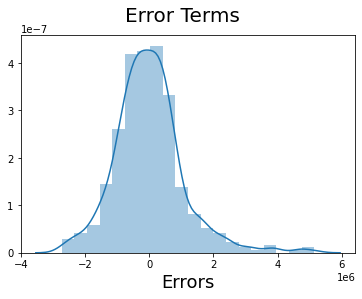

In [111]:
# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Since the error terms show a normal distribution curve, this satifies one of the condition for a good model

## Part-12: checking for Homoscedasticity

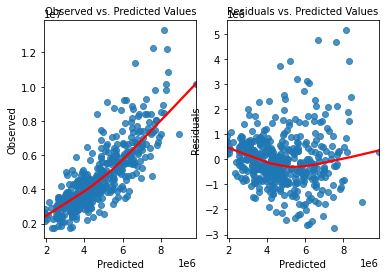

In [112]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()   # predicting y_train from the model
    resids = model.resid            # absolute error (actual - predicted)

    fig, ax = plt.subplots(1,2)
    #this curve sia plot of predicted values and training data -actual prices
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    # this curce is a plot between predicted values and residuals
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lr1, y_train)
#residual vs predicted values do not show a pattern so data is homoscadastic


### since the band is a spread out one across the line, this pattern is homoscedastic, which means it is a good model

## Part-13: Checking for auto-collinearity thru Durbin-Watson test

(436,)


<ipython-input-113-deaad63fc68f>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


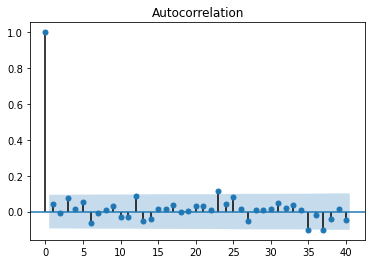

In [113]:
import statsmodels.tsa.api as smt
print(lr1.resid.shape)
acf = smt.graphics.plot_acf(lr1.resid, lags=40, alpha=0.05)
acf.show()

### from the above chart it is clear that all correlations are small (less than 0.1); hence the model is good

## Part-14: Making Predictions using final model lr1

In [114]:
# we have already rescaled the test data df1_test
# we also have all the features in test data, as we had in the final model selected

# we will now split the test data into x and y part

y_test=df1_test['price']
x_test=df1_test.drop('price', axis=1)

# adding a constant that will represent the y-intercept W0
# this adds a feature column so that the training includes w0

x_test_lm=st.add_constant(x_test)

In [115]:
# Makiing predictions on test data using the model
y_pred_lr1 = lr1.predict(x_test_lm)


## Part-15: Model Evaluation

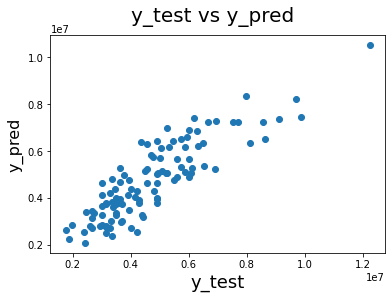

In [116]:
# Plotting y_test and y_pred_lr1 to understand the spread
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test, y_pred_lr1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

## Final Equation of best fitted line:
- price = 0.18933 + 0.34006 * area + 0.58551 * bedrooms + 0.27997 * bathrooms + 0.14140 * stories + 0.54721 * mainroad + 0.25189 * guestroom + 0.30052 * basement + 0.87673 * hotwaterheating + 0.89714 * airconditioning + 0.88904 * parking + 0.64753 * prefarea + 0.26598 * semi-furnished - 0.39584 * unfurnished

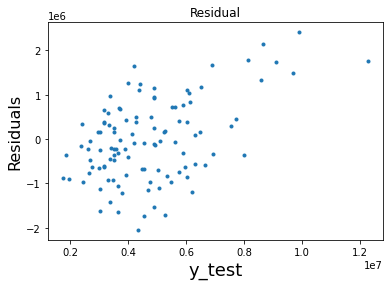

In [117]:
# Plotting y_test and residual to understand the spread

fig = plt.figure()
plt.plot(y_test , y_test-y_pred_lr1, '.')
#fig.suptitle('Residuals', fontsize = 20)              # Plot heading 
plt.title("Residual")
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('Residuals', fontsize = 16)
plt.show()

## 2nd Iteration to improve the model

In [118]:
# will drop mainroad, guestroom, hotwaterheating and prefarea from the 2nd model

df2=df1.drop(['mainroad', 'guestroom', 'hotwaterheating', 'prefarea'], axis=1)

In [119]:
df2.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,semi-furnished,unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,0,1,0.666667,0,0
1,12250000,0.502405,0.6,1.000000,1.000000,0,1,1.000000,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,0.666667,1,0
3,12215000,0.402062,0.6,0.333333,0.333333,1,1,1.000000,0,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,0.666667,0,0


In [120]:
# splitting dataset into test and train set

from sklearn.model_selection import train_test_split

df2_train, df2_test=train_test_split(df2, train_size=0.75, test_size=0.25, random_state=50)

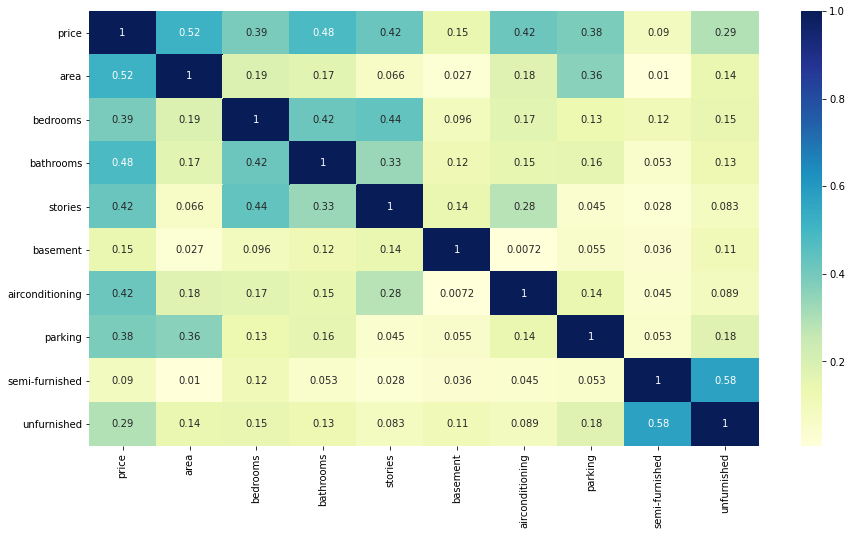

In [123]:
# checking for collinearity map to understand which variables are correlated
plt.figure(figsize=(15,8))
sns.heatmap(df2_train.corr().abs(), annot=True, cmap='YlGnBu')
plt.show()

In [124]:
# splitting training data into independent and target variables

y_train2=df2_train['price']
x_train2=df2_train.drop('price', axis=1)

In [125]:
# The API focuses on models and the most frequently used statistical test, and tools.
import statsmodels.api as st

In [126]:
# adding a constant that will represent the y-intercept W0
# this adds a feature column so that the training includes w0

x_train_lm2=st.add_constant(x_train2[['area']])
x_train_lm2.head()

,const,area
378,1.0,0.042955
505,1.0,0.161512
304,1.0,0.453608
238,1.0,0.196564
328,1.0,0.195876


In [129]:
# Creating a first fitted model  OLS= Ordinary Least Squares
# Fitting a line between price and area

lr2=st.OLS(y_train2, x_train_lm2).fit()

# checking the parameters obtained
print(lr2.params)
print(lr2.summary())

const    3.250411e+06
area     6.264279e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.26e-29
Time:                        00:37:45   Log-Likelihood:                -6408.4
No. Observations:                 408   AIC:                         1.282e+04
Df Residuals:                     406   BIC:                         1.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [130]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const       1.858446e+06
area        5.570915e+06
bedrooms    4.023334e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.79e-39
Time:                        00:39:45   Log-Likelihood:                -6382.2
No. Observations:                 408   AIC:                         1.277e+04
Df Residuals:                     405   BIC:                         1.278e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [132]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const        2.283630e+06
area         5.192159e+06
bedrooms     2.204730e+06
bathrooms    3.844241e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.75e-52
Time:                        00:41:47   Log-Likelihood:                -6349.4
No. Observations:                 408   AIC:                         1.271e+04
Df Residuals:                     404   BIC:                         1.272e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [133]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms', 'stories']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const        2.353650e+06
area         5.304406e+06
bedrooms     9.050345e+05
bathrooms    3.277732e+06
stories      1.751185e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           9.00e-61
Time:                        00:42:18   Log-Likelihood:                -6327.5
No. Observations:                 408   AIC:                         1.266e+04
Df Residuals:                     403   BIC:                         1.268e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

In [134]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms', 'stories', 'basement']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const        2.233146e+06
area         5.319398e+06
bedrooms     6.271607e+05
bathrooms    3.046766e+06
stories      1.988134e+06
basement     5.580085e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     89.29
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           5.18e-63
Time:                        00:43:02   Log-Likelihood:                -6319.7
No. Observations:                 408   AIC:                         1.265e+04
Df Residuals:                     402   BIC:                         1.268e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

In [135]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const              2.184843e+06
area               4.899456e+06
bedrooms           6.096806e+05
bathrooms          2.964610e+06
stories            1.594530e+06
basement           5.245822e+05
airconditioning    9.171434e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     89.12
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.10e-70
Time:                        00:43:51   Log-Likelihood:                -6299.3
No. Observations:                 408   AIC:                         1.261e+04
Df Residuals:                     401   BIC:                         1.264e+04
Df Model:                           6                                         
Covariance Type:            nonrobust             

In [136]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const              2.153425e+06
area               4.245815e+06
bedrooms           5.284788e+05
bathrooms          2.812571e+06
stories            1.635323e+06
basement           5.071426e+05
airconditioning    8.667827e+05
parking            1.082236e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     83.71
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.09e-74
Time:                        00:44:27   Log-Likelihood:                -6288.1
No. Observations:                 408   AIC:                         1.259e+04
Df Residuals:                     400   BIC:                         1.262e+04
Df Model:                           7                                         
Covariance Type:  

In [137]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking', 'semi-furnished']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const              2.090990e+06
area               4.260705e+06
bedrooms           4.335182e+05
bathrooms          2.807177e+06
stories            1.637572e+06
basement           5.022394e+05
airconditioning    8.833880e+05
parking            1.061933e+06
semi-furnished     2.230786e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.10
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.76e-74
Time:                        00:45:04   Log-Likelihood:                -6286.4
No. Observations:                 408   AIC:                         1.259e+04
Df Residuals:                     399   BIC:                         1.263e+04
Df Model:                           8                            

In [138]:
# Assign two feature variables to x_train
x_train_lm2=x_train2[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking', 'semi-furnished', 'unfurnished']]

# Build a linear model
import statsmodels.api as st
x_train_lm2=st.add_constant(x_train_lm2)

lr2=st.OLS(y_train2, x_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const              2.491644e+06
area               4.130152e+06
bedrooms           4.181708e+05
bathrooms          2.756720e+06
stories            1.605400e+06
basement           4.567137e+05
airconditioning    8.440102e+05
parking            9.697796e+05
semi-furnished    -7.507594e+04
unfurnished       -5.693868e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     69.11
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           8.29e-76
Time:                        00:49:16   Log-Likelihood:                -6280.1
No. Observations:                 408   AIC:                         1.258e+04
Df Residuals:                     398   BIC:                         1.262e+04
Df Model:                        

In [139]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm2.values, i) for i in range(x_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


# the below table shows the colinearity of each feature with all other features

,Features,VIF
0,const,14.67
9,unfurnished,1.61
8,semi-furnished,1.54
2,bedrooms,1.44
4,stories,1.44
3,bathrooms,1.30
1,area,1.21
7,parking,1.19
6,airconditioning,1.14
5,basement,1.09
